## Evaluating classifiers
#### _Lets test how good our models are_

---

* **Learning objective**: 
    * Understand the main tools available to judge your model
    * **sklearn.metrics** is your friend!
* **Content to be covered**:
    * True & False /  Positives & Negatives: 
    * Accuracy
    * Precision vs recall
    * Confusion matrix
    * ROC and AUC
* **First the theory, then the applied coding**

---

### True & False /  Positives & Negatives:

| Scenario | Predicted: NO | Predicted: YES |
| --- | ----- | --- |
| **Actual: NO** | TN | FP |
| **Actual: YES** | FN | TP |

#### Scenario 1: Gold Diggers!
* We build a scanner which scans earth samples from different regions for gold. If we find it we excavate that area
* Important to consider: Excavating earth is expensive! So if we don't find gold we lose lots of money! 
* Do we care more about false positives or false negatives?

#### Scenario 2: Test for Breast Cancer
* We build a tool which tests mammograms for the presence of breast cancer
* Important to consider: Missing a cancerous screening is really bad for the patient, and the clinic
* Do we care more about false positives or false negatives?

---

### Lets work with the breast cancer example
#### So we have to load the data

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
bunch = load_breast_cancer()

In [21]:
type(bunch)

sklearn.utils.Bunch

In [22]:
#Bunches are dictionaries - more or less
bunch.items()
bunch.keys() #collection of all the things in the bunch dataset

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(bunch['DESCR'])

In [69]:
X = bunch['data']
y = bunch['target']

In [93]:
len(y)
y.sum()

357

In [26]:
type(X)
type(y)

numpy.ndarray

In [27]:
X.shape

(569, 30)

In [28]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [29]:
import pandas as pd
df = pd.DataFrame(X, columns=bunch['feature_names'])

In [30]:
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


### And examine it

---

#### Now lets create a model which can predict whether a patient has breast cancer or not
* Initialise a model
* Train test split our data set
* Fit the model on the train data
* Predict the model on some test data

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
from sklearn.model_selection import train_test_split

In [70]:
m = LogisticRegression()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y) 

In [68]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


In [51]:
y.sum()

357

In [35]:
bunch['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [72]:
m.fit(X_train,y_train)

C:\Users\tomga\Anaconda3\envs\deep_l\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
ytrainpred = m.predict(X_train)

In [74]:
ypred = m.predict(X_test)

In [63]:
from math import e
import numpy as np
def sigmoid(x):
    return 1 / (1 + e ** -x)

In [64]:
x = np.array(range(-10,10))
y = sigmoid(x)

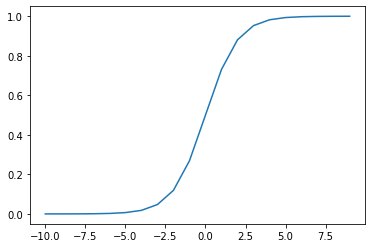

In [66]:
import matplotlib.pyplot as plt
plt.plot(x,y)

### Accuracy:
* The percentage of correct guesses
* A nice simple way of assessing the model
* Fails with class imbalance - assigns more weight to smaller 

---

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred)

0.965034965034965

In [76]:
m.score(X_train,y_train)

0.9483568075117371

In [77]:
accuracy_score(y_train,ytrainpred)

0.9483568075117371

### Precision vs recall
* A trade off between exactness and totalness
* Precision = **exactness** 
* Precision = tp / (tp + fp)
    * High Precision = more relevant than irrelevant results returned (at the expense of missing some relevant ones)
    * Also called False Positive Rate
    * High when false positives are low
* Recall = **totalness**. 
* Recall = tp / (tp + fn)
    * High Recall = most of the relevant results returned, (at the expense of including bad results)
    * Also called True Positive Rate
    * High when false negatives are low 
* Remember the two scenarios! Which one suits which measure?

---

### Confusion matrix
* Lets plot the confusion matrix of scenario two, and then prettify it with seaborn
* Refer above to understand the structure

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [80]:
conf = confusion_matrix(y_test, ypred)

Text(42.0, 0.5, 'Actual')

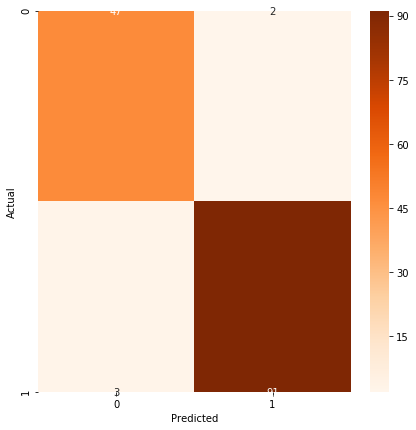

In [85]:
plt.figure(figsize=(7,7))
sns.heatmap(conf, cmap='Oranges', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [86]:
conf

array([[47,  2],
       [ 3, 91]], dtype=int64)

---

### ROC and AUC
* A bit like the confusion matrix, but it still works when there is class imbalance
* Receiver Operating Characteristics Curve 
    * ROC shows the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. 
    * Put another way, plot recall on the x-axis, and precision on the y-axis
* Area Under Curve
    * the AUC function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. It returns the AUC score between 0.0 and 1.0
* We basically want as much under the curve as possible! So the higher the AUC the better!

In [88]:
from sklearn.metrics import roc_curve, auc

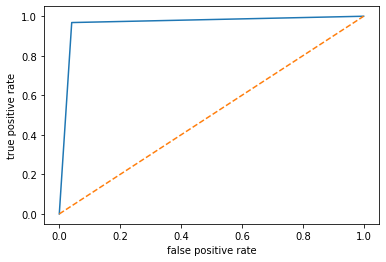

In [90]:
fpr, tpr, _ = roc_curve(y_test,ypred)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot([0,1],[0,1], linestyle='--')

In [94]:
from sklearn.metrics import f1_score

In [95]:
f1_score(y_test, ypred)

0.9732620320855615

---